<a href="https://colab.research.google.com/github/tak-creator/giganci/blob/main/pandas_pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
pd.read_csv('Pokemon.csv')

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [4]:
dataframe = pd.read_csv('Pokemon.csv')
#print(dataframe)

unikatowe_typy = dataframe['Type 1'].unique()
print(unikatowe_typy)
ile_unikatowych_typów = len(unikatowe_typy)
print(f'Ile jest typów pokemonów {ile_unikatowych_typów}')

type_counts= dataframe["Type 1"].value_counts()
print(type_counts)

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
Ile jest typów pokemonów 18
Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64


Generation
1    166
5    165
3    160
4    121
2    106
6     82
Name: count, dtype: int64


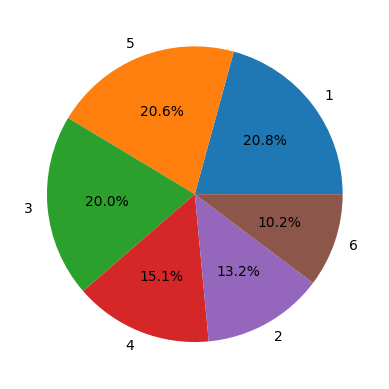

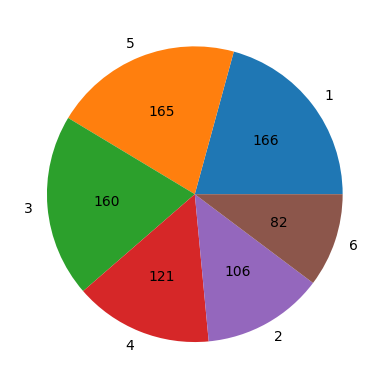

In [5]:
#Policz ile jest pokemonów z danej generacji

generation_counts = dataframe["Generation"].value_counts()
print(generation_counts)

import matplotlib.pyplot as plt
plt.pie(generation_counts, labels=generation_counts.index, autopct='%1.1f%%')
plt.show()

plt.pie(generation_counts,
        labels=generation_counts.index,
        autopct=lambda pct: f"{int(round(pct/100.*generation_counts.sum()))}")
plt.show()

In [6]:
A = dataframe['Legendary']
B = dataframe[A == True]
C = len(B)

print(C)

65


In [7]:
T2 = dataframe['Type 2']
T2bezType = T2.isnull().sum()
print(T2bezType)

386


In [8]:
Top10 = dataframe['Total'].nlargest(10)
print(Top10)

163    780
164    780
426    780
422    770
424    770
552    720
268    700
409    700
413    700
418    700
Name: Total, dtype: int64


In [9]:
average_hp_by_type = dataframe.groupby('Type 1')['HP'].mean()
print(f'Średnia HP dla typów {average_hp_by_type}')
average_hp = dataframe['HP'].mean()
print(f'Średnia dla HP {average_hp}')

Średnia HP dla typów Type 1
Bug         56.884058
Dark        66.806452
Dragon      83.312500
Electric    59.795455
Fairy       74.117647
Fighting    69.851852
Fire        69.903846
Flying      70.750000
Ghost       64.437500
Grass       67.271429
Ground      73.781250
Ice         72.000000
Normal      77.275510
Poison      67.250000
Psychic     70.631579
Rock        65.363636
Steel       65.222222
Water       72.062500
Name: HP, dtype: float64
Średnia dla HP 69.25875


7) Znajdź wszystkie pokemony, których typ (Type 1) to ogień
8) Wyświetl pokemony z HP większe od 100
9) Wyswietl pokemony z Speed wieksze od 120
10) Wyswietl pokemony które mają atak >100 ORAZ Defence < 50
regresja liniowa

In [10]:
A = dataframe['Type 1']
B = dataframe[A == 'Fire']
C = B['#'].count()
print(C)

#fire_pokemon = dataframe[dataframe['Type 1'] == 'Fire']['#'].count()
#print(fire_pokemon)

52


In [11]:
A = dataframe['HP']
B = dataframe[A > 100]
C = B['#'].count()
print(C)

67


In [12]:
A = dataframe['Speed']
B = dataframe[A > 120]
C = B['#'].count()
print(C)

29


In [13]:
A = dataframe['Attack']
B = dataframe['Defense']
C = dataframe[(A > 100) & (B < 50)]
D = C['#'].count()
print(D)

5


## ***llm***
##### (attak defence legendarny i normalny)

Klasyfikacja pokemonów attak defence legendarny i normalny

In [26]:
# prompt: Klasyfikacja pokemonów attak defence legendarny i normalny

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


# Załaduj dane
dataframe = pd.read_csv('Pokemon.csv')

# Przygotuj dane do klasyfikacji
X = dataframe[['Attack', 'Defense']]
Y = dataframe['Legendary'].astype(int)  # Konwersja wartości logicznych na liczby 1 i 0

In [27]:
Y.value_counts()

print(f"Liczba zwykłych Pokémonów (0): {Y.value_counts()[0]}")
print(f"Liczba legendarnych Pokémonów (1): {Y.value_counts()[1]}")

Liczba zwykłych Pokémonów (0): 735
Liczba legendarnych Pokémonów (1): 65


In [28]:
#Podział na zbiór uczący i testowy
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=42
)
#Tworzenie i trenowanie modelu
model = LogisticRegression()# Tworzy obiekt modelu regresji logistycznej
model.fit(X_train, Y_train)

# Predykcja na zbiorze testowym
Y_pred = model.predict(X_test)

|                   | Predykcja = 1        | Predykcja = 0        |
|-------------------|----------------------|----------------------|
| **Rzeczywista = 1** | True Positive (TP)   | False Negative (FN)  |
| **Rzeczywista = 0** | False Positive (FP)  | True Negative (TN)   |

**Metryki:**

| Metryka           | Wzór                                                  |
|-------------------|-------------------------------------------------------|
| accuracy_score    | (TP + TN) / (TP + TN + FP + FN)                       |
| precision_score   | TP / (TP + FP)                                        |
| recall_score      | TP / (TP + FN)                                        |
| f1_score          | 2 · (precision · recall) / (precision + recall)       |


In [29]:
accuracy  = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall    = recall_score(Y_test, Y_pred)
f1        = f1_score(Y_test, Y_pred)


***Accuracy*** mierzy odsetek wszystkich poprawnie sklasyfikowanych przykładów (pozytywnych i negatywnych) w zbiorze danych

***Precision*** to odsetek poprawnych predykcji klasy „pozytywnej” spośród wszystkich przykładów oznaczonych przez model jako pozytywne

***Recall*** (zwany też TPR – True Positive Rate lub sensitivity) to odsetek prawdziwych pozytywów wychwyconych przez model spośród wszystkich rzeczywistych przykładów pozytywnych

***F1‑score*** to harmoniczna średnia precyzji i recall, łącząca oba aspekty w jedną miarę

In [30]:
print(f'Accuracy:  {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall:    {recall:.4f}')
print(f'F1-score:  {f1:.4f}')

print('\nClassification Report:\n', classification_report(Y_test, Y_pred))


Accuracy:  0.9375
Precision: 0.5000
Recall:    0.2000
F1-score:  0.2857

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       150
           1       0.50      0.20      0.29        10

    accuracy                           0.94       160
   macro avg       0.72      0.59      0.63       160
weighted avg       0.92      0.94      0.92       160



`plt.figure(figsize=(8, 6))`

Tworzy nowy obszar rysowania o rozmiarze 8×6 cala.

`plt.scatter(...)`

Rysuje punkty na wykresie:

Oś X: wartość Attack.

Oś Y: wartość Defense.

`c=Y_pred` – kolor zależy od przewidywanej klasy.

`cmap='coolwarm'` – paleta kolorów od niebieskiego przez biały do czerwonego.

`edgecolors='k'` – czarne obramowanie punktów.

`alpha=0.7` – przezroczystość, by widzieć nakładające się punkty.

`plt.xlabel, plt.ylabel, plt.title`

Etykiety osi i tytuł wykresu.

`plt.colorbar(...)`

Dodaje legendę kolorów, wyjaśniającą, która barwa odpowiada której klasie.

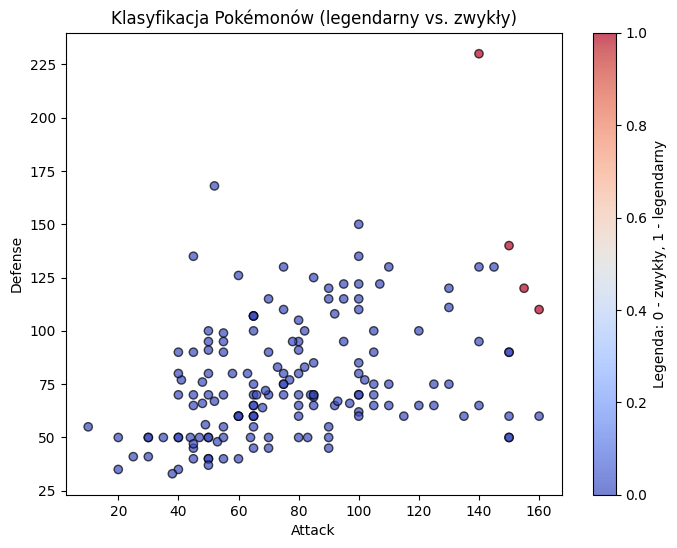

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(
    X_test['Attack'],
    X_test['Defense'],
    c=Y_pred,
    cmap='coolwarm',
    edgecolors='k',
    alpha=0.7
)
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Klasyfikacja Pokémonów (legendarny vs. zwykły)')
plt.colorbar(label='Legenda: 0 - zwykły, 1 - legendarny')
plt.show()


## ***llm***
##### (attack defence od gen)

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

dataframe = pd.read_csv('Pokemon.csv')

X = dataframe[['Attack', 'Defense']]
Y = dataframe['Generation']

print(Y.value_counts().sort_index())

Generation
1    166
2    106
3    160
4    121
5    165
6     82
Name: count, dtype: int64


In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=42,
    stratify=Y                   # zachowujemy proporcje każdej generacji
)

In [47]:
# 3. Standaryzacja
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

In [48]:
# 4. Cechy wielomianowe
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_p = poly.fit_transform(X_train_s)
X_test_p  = poly.transform(X_test_s)

In [49]:
# 5. GridSearch dla Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}
grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid, cv=5, scoring='accuracy', n_jobs=-1
)
grid.fit(X_train_p, Y_train)
rf_best = grid.best_estimator_

In [50]:
# 6. Ocena na zbiorze testowym
Y_pred = rf_best.predict(X_test_p)
print(f"Accuracy: {accuracy_score(Y_test, Y_pred):.4f}")
print(classification_report(Y_test, Y_pred))

Accuracy: 0.2500
              precision    recall  f1-score   support

           1       0.22      0.33      0.27        33
           2       0.25      0.14      0.18        21
           3       0.20      0.19      0.19        32
           4       0.23      0.21      0.22        24
           5       0.31      0.36      0.33        33
           6       0.38      0.18      0.24        17

    accuracy                           0.25       160
   macro avg       0.26      0.24      0.24       160
weighted avg       0.26      0.25      0.24       160



In [51]:
# 7. Cross-validation na całym zbiorze
scores = cross_val_score(
    rf_best,
    poly.transform(scaler.transform(X)),
    Y, cv=5, scoring='accuracy', n_jobs=-1
)
print(f"Mean CV Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

Mean CV Accuracy: 0.2237 ± 0.0155


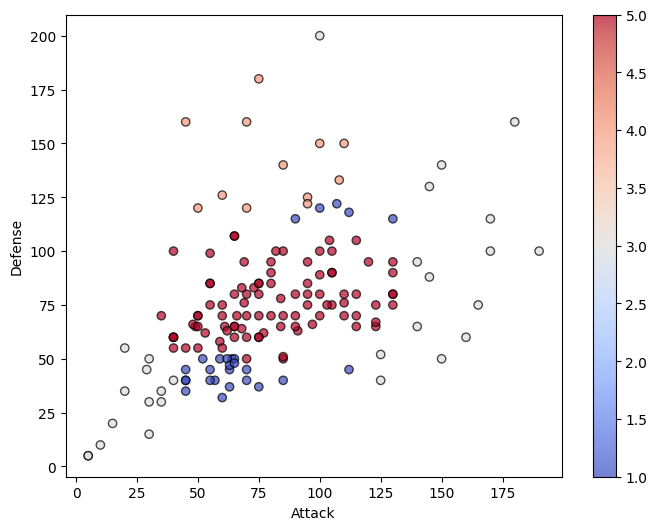

In [58]:
# Wizualizacja danych i decyzji
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Attack'], X_test['Defense'], c=Y_pred, cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.colorbar()
plt.show()

Accuracy: 0.2562
              precision    recall  f1-score   support

           1       0.22      0.33      0.27        33
           2       0.17      0.10      0.12        21
           3       0.27      0.25      0.26        32
           4       0.41      0.29      0.34        24
           5       0.26      0.39      0.31        33
           6       0.00      0.00      0.00        17

    accuracy                           0.26       160
   macro avg       0.22      0.23      0.22       160
weighted avg       0.24      0.26      0.24       160

Mean CV Accuracy: 0.2350 ± 0.0434


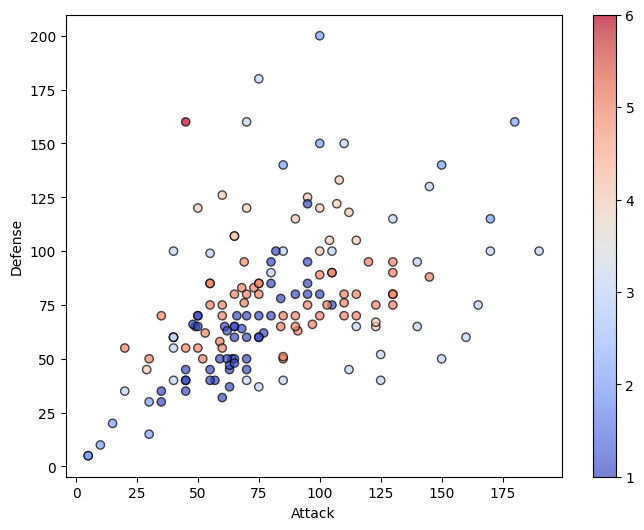

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Wczytanie danych
dataframe = pd.read_csv('Pokemon.csv')

# Wybór cech i etykiet
X = dataframe[['Attack', 'Defense']]
Y = dataframe['Generation']

# Podział na zbiór treningowy i testowy
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=42,
    stratify=Y
)

# Standaryzacja
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

# Cechy wielomianowe (stopień 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_p = poly.fit_transform(X_train_s)
X_test_p  = poly.transform(X_test_s)

# GridSearch dla Random Forest z dostosowanymi hiperparametrami
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid, cv=5, scoring='accuracy', n_jobs=-1
)
grid.fit(X_train_p, Y_train)
rf_best = grid.best_estimator_

# Ocena na zbiorze testowym
Y_pred = rf_best.predict(X_test_p)
print(f"Accuracy: {accuracy_score(Y_test, Y_pred):.4f}")
print(classification_report(Y_test, Y_pred))

# Cross-validation na całym zbiorze
scores = cross_val_score(
    rf_best,
    poly.transform(scaler.transform(X)),
    Y, cv=5, scoring='accuracy', n_jobs=-1
)
print(f"Mean CV Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

# Wizualizacja danych i decyzji
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Attack'], X_test['Defense'], c=Y_pred, cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.colorbar()
plt.show()
